In [1]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import plotly.express as px
import matplotlib.tri as tri


In [3]:
data  = pd.read_csv("/content/bank-additional-full.xls", sep = ';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.shape

(41188, 21)

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

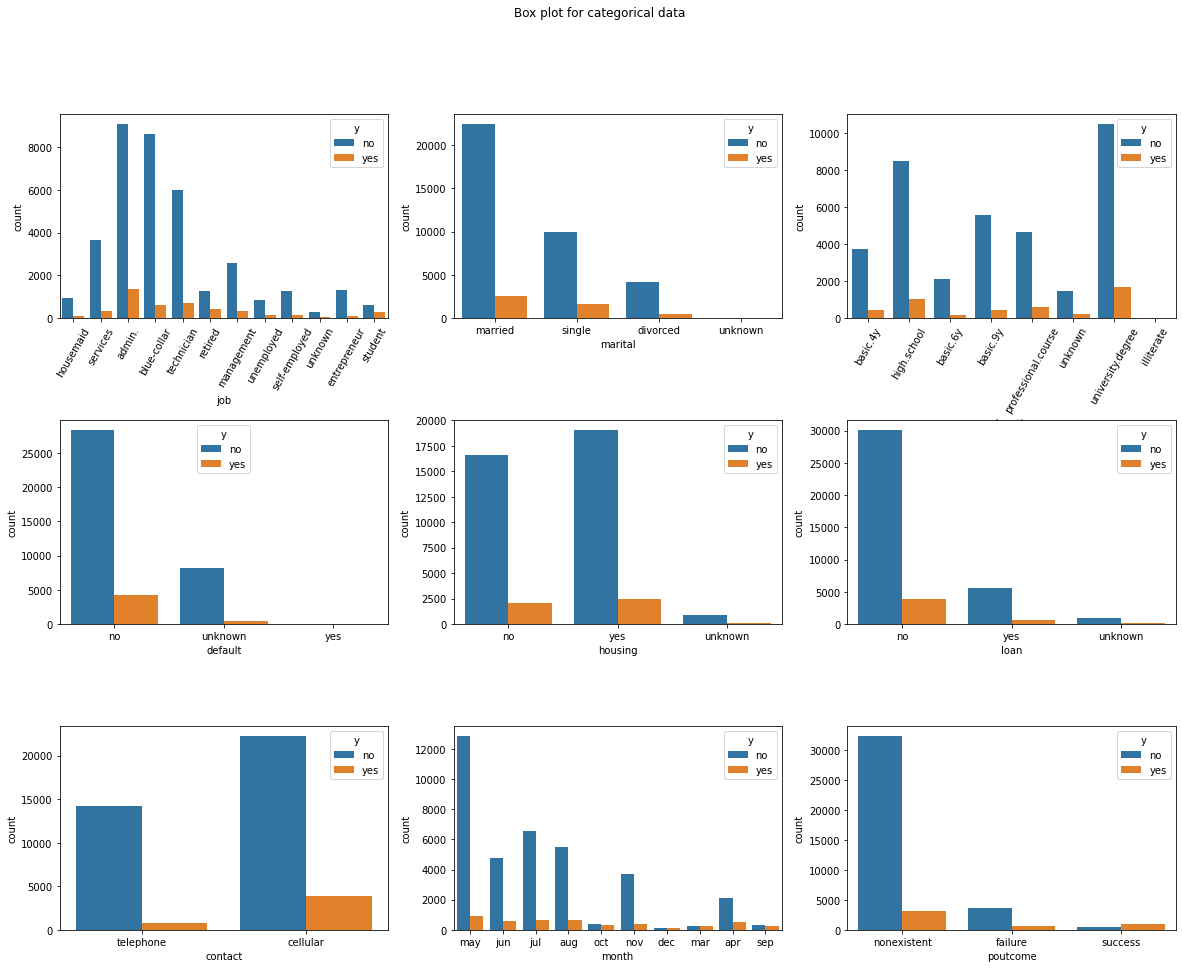

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
  
fig.suptitle('Box plot for categorical data')
  
ax=sns.countplot(ax=axes[0, 0], data=data, x='job', hue='y')
ax = axes[0,0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.countplot(ax=axes[0, 1], data=data, x='marital', hue='y')
sns.countplot(ax=axes[0, 2], data=data, x='education', hue='y')
ax = axes[0,2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.countplot(ax=axes[1, 0], data=data, x='default', hue='y')
sns.countplot(ax=axes[1, 1], data=data, x='housing', hue='y')
sns.countplot(ax=axes[1, 2], data=data, x='loan', hue='y')
sns.countplot(ax=axes[2, 0], data=data, x='contact', hue='y')
sns.countplot(ax=axes[2, 1], data=data, x='month', hue='y')
sns.countplot(ax=axes[2, 2], data=data, x='poutcome', hue='y')
plt.subplots_adjust(hspace=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47c7c9a940>,
      dtype=object)

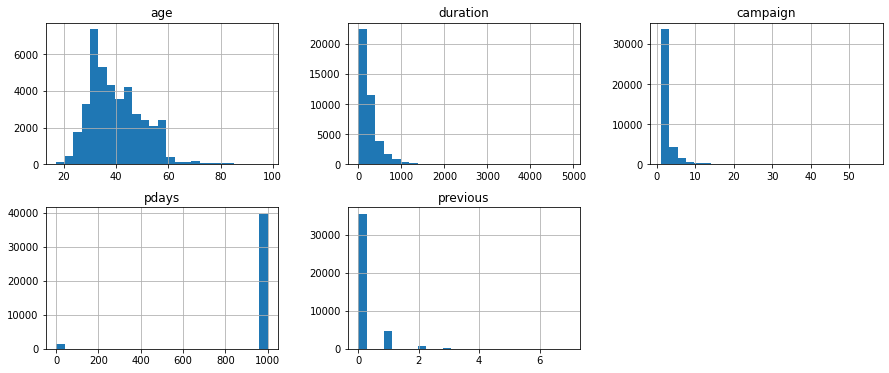

In [9]:
data_int = data.select_dtypes(include = ['int64'])
data_int.hist(bins=25, figsize=(15, 6), layout=(2, 3))

In [10]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [11]:
month_names = [calendar.month_abbr[i].lower() for i in range(1, 13)]
data['month'] = [month_names.index(month)+1 for month in data['month']]

In [12]:
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [13]:
day_names = [calendar.day_abbr[i].lower() for i in range(0, 7)]
data['day_of_week'] = [day_names.index(day)+1 for day in data['day_of_week']]

In [14]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [15]:
data = data.drop('default',axis = 1)

In [16]:
df = pd.DataFrame(data[~data.isin(['unknown']).any(axis=1)])

In [17]:
100*(data.shape[0]-df.shape[0])/data.shape[0]

7.145285034476061

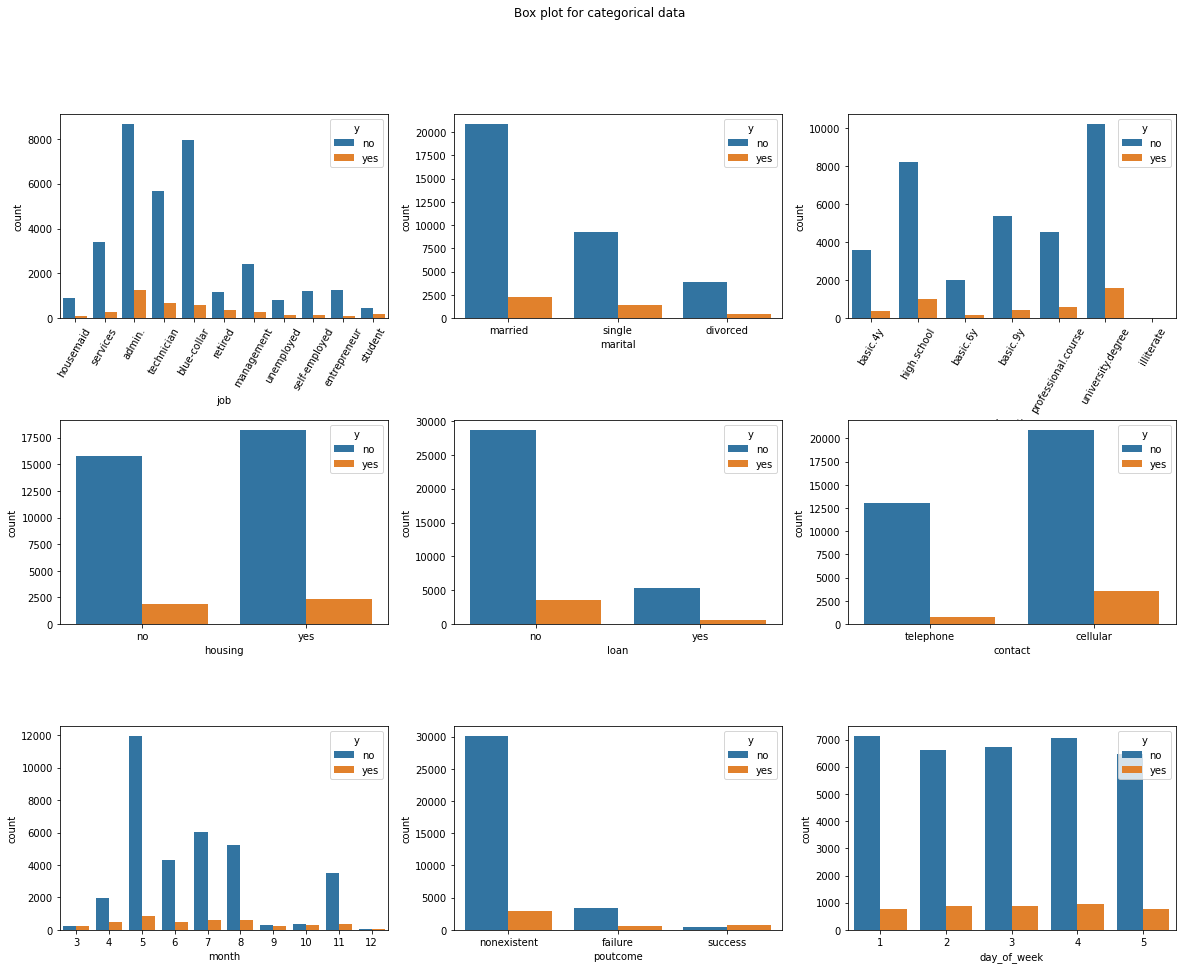

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
  
fig.suptitle('Box plot for categorical data')
  
ax=sns.countplot(ax=axes[0, 0], data=df, x='job', hue='y')
ax = axes[0,0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.countplot(ax=axes[0, 1], data=df, x='marital', hue='y')
sns.countplot(ax=axes[0, 2], data=df, x='education', hue='y')
ax = axes[0,2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.countplot(ax=axes[1, 0], data=df, x='housing', hue='y')
sns.countplot(ax=axes[1, 1], data=df, x='loan', hue='y')
sns.countplot(ax=axes[1, 2], data=df, x='contact', hue='y')
sns.countplot(ax=axes[2, 0], data=df, x='month', hue='y')
sns.countplot(ax=axes[2, 1], data=df, x='poutcome', hue='y')
sns.countplot(ax=axes[2, 2], data=df, x='day_of_week', hue='y')
plt.subplots_adjust(hspace=0.5)

In [19]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [20]:
df['poutcome'] = df['poutcome'].replace({'nonexistent' : 2, 'failure' : 0, 'success' : 1})

In [21]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [22]:
df['y'] = df['y'].replace({'yes' : 1, 'no' : 0})

In [23]:
df.housing.unique(),df.loan.unique()

(array(['no', 'yes'], dtype=object), array(['no', 'yes'], dtype=object))

In [24]:
df['housing'] = df['housing'].replace({'yes' : 1, 'no' : 0})
df['loan'] = df['loan'].replace({'yes' : 1, 'no' : 0})

In [25]:
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [26]:
df['contact'] = df['contact'].replace({'telephone' : 1, 'cellular' : 2})

In [27]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [28]:
df['marital'] = df['marital'].replace({'married': 1, 'single': 0, 'divorced': 2})

In [29]:
object_columns = df.select_dtypes(['object'])
object_columns.head()

,job,education
0,housemaid,basic.4y
1,services,high.school
2,services,high.school
3,admin.,basic.6y
4,services,high.school


In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])
df['education'] = label_encoder.fit_transform(df['education'])

In [31]:
df.describe()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,3.652713,0.831141,3.612132,0.538057,0.155811,1.639064,6.620081,2.977095,258.207583,2.566662,963.531651,0.170009,1.761668,0.082861,93.570313,-40.541164,3.623298,5167.432566,0.111335
std,10.289488,3.555407,0.604422,2.065540,0.498556,0.362681,0.480278,2.048797,1.410399,259.792638,2.767473,184.295254,0.487169,0.622391,1.565945,0.576367,4.623200,1.730226,71.760333,0.314550
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,2.000000,102.000000,1.000000,999.000000,0.000000,2.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,1.000000,0.000000,2.000000,6.000000,3.000000,180.000000,2.000000,999.000000,0.000000,2.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,7.000000,1.000000,6.000000,1.000000,0.000000,2.000000,8.000000,4.000000,319.000000,3.000000,999.000000,0.000000,2.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,10.000000,2.000000,6.000000,1.000000,1.000000,2.000000,12.000000,5.000000,4918.000000,43.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [32]:
Y = pd.DataFrame(df['y'])

In [33]:
X = df.drop('y', axis = 1)

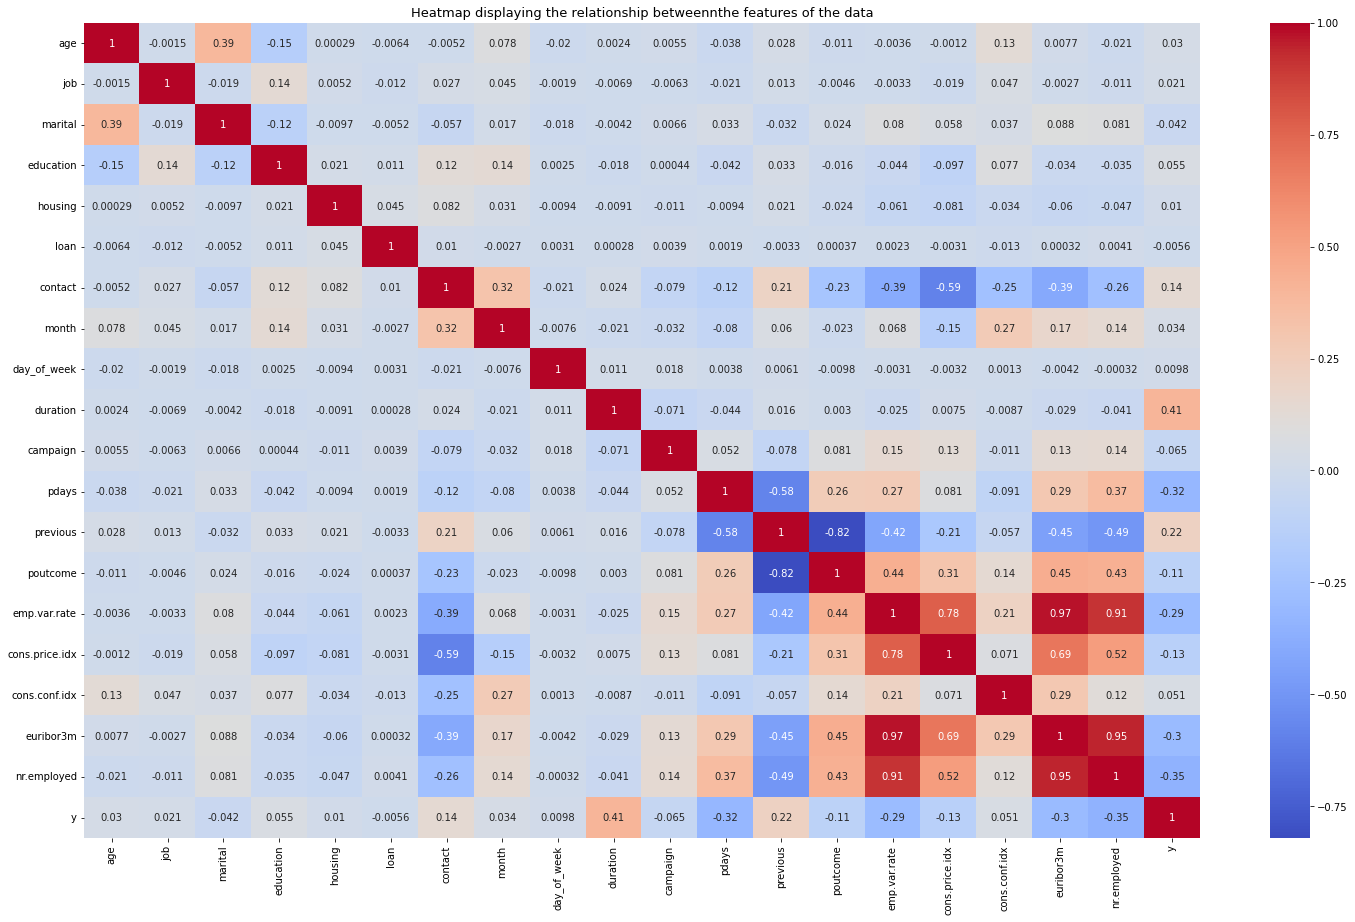

In [34]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2,stratify= Y, random_state = 101)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(class_weight={0:2,1:6})
hyperparameters = {'max_depth': [3,5,7,9],
              'min_samples_split': [4,7,10,13],
              'min_samples_leaf': [5, 7, 10, 13]}
grid_search = GridSearchCV(estimator=dtc, param_grid=hyperparameters, cv=5)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
max_depths = results['param_max_depth'].values
min_samples_splits = results['param_min_samples_split'].values
min_samples_leafs = results['param_min_samples_leaf'].values
accuracy_scores = results['mean_test_score'].values

scores = pd.DataFrame({'max_depth': max_depths,
                          'min_samples_split': min_samples_splits,
                          'min_samples_leaf': min_samples_leafs,
                          'accuracy_score': accuracy_scores})


In [37]:
fig = px.scatter_3d(scores, 
                         x='max_depth', 
                         y='min_samples_split', 
                         z='min_samples_leaf', 
                         color='accuracy_score',
                         title='Accuracy Scores for Different Hyperparameter Combinations')
fig.show()



In [38]:
good_tree = pd.DataFrame(scores[scores['accuracy_score'] == max(accuracy_scores)])

In [39]:
maxdepth = good_tree['max_depth'].values[0]
minsplit = good_tree['min_samples_split'].values[0]
minleaf = good_tree['min_samples_leaf'].values[0]

In [40]:
model = DecisionTreeClassifier(max_depth = maxdepth, min_samples_split = minsplit, min_samples_leaf = minleaf,class_weight={0:2,1:6})

In [41]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 6}, max_depth=7,
                       min_samples_leaf=13, min_samples_split=4)

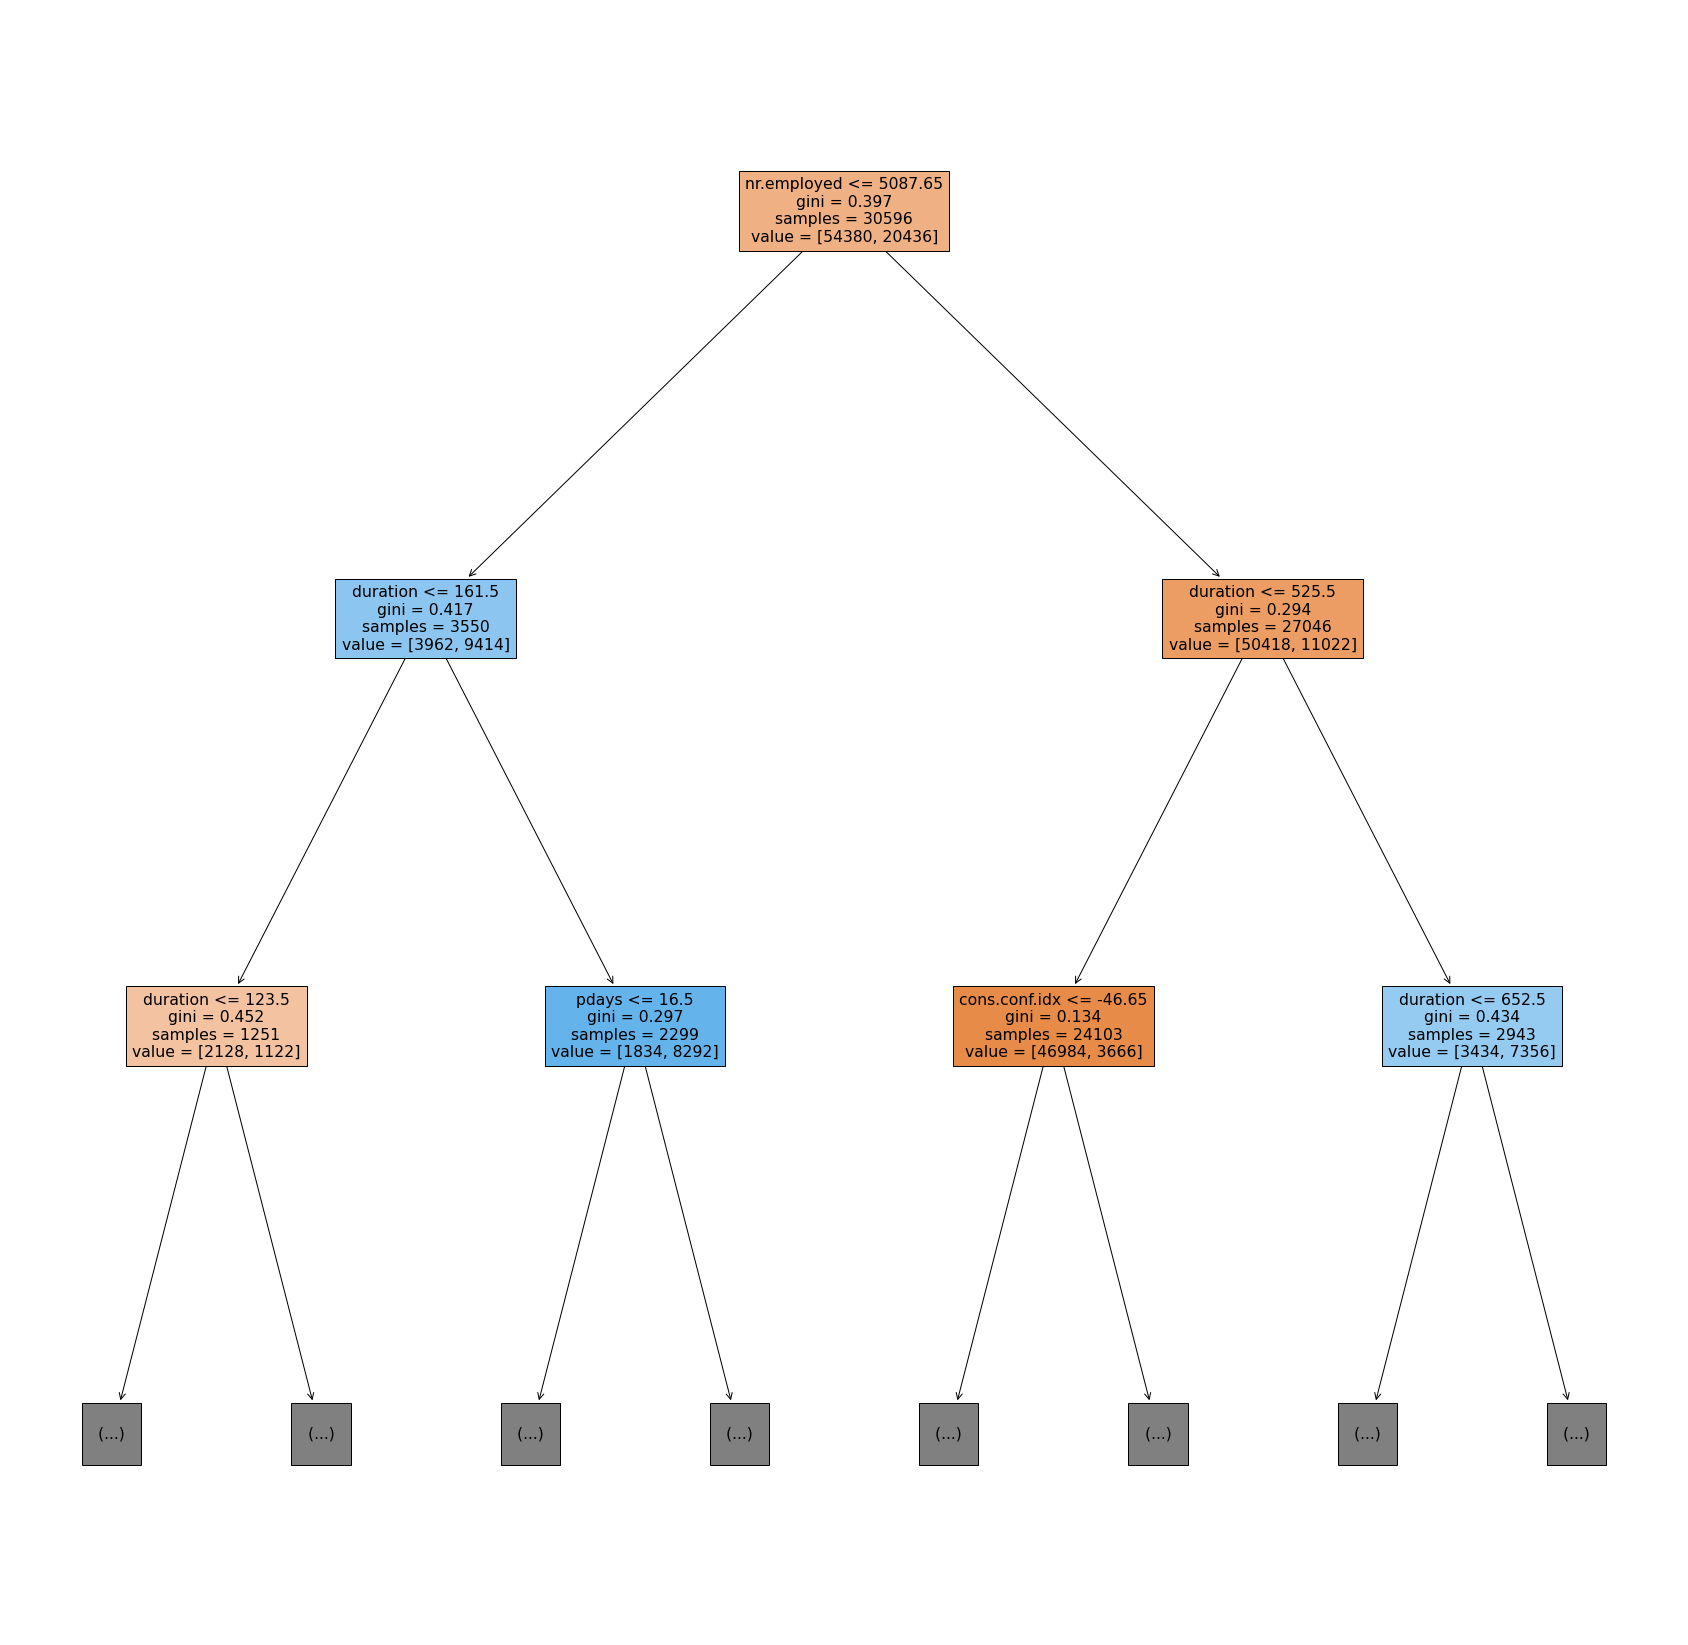

In [42]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,30))
plot_tree(model, filled=True, max_depth = 2, feature_names = X_train.columns)
plt.show()

In [43]:
y_pred=model.predict(X_test)
print('Confusion Matrix  \n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report  \n')
print(classification_report(y_test,y_pred))
print('Accuracy : ',round(accuracy_score(y_test,y_pred),3))
print('Precision : ',round(precision_score(y_test,y_pred),3))
print('Recall : ',round(recall_score(y_test,y_pred),3))
print('f1 : ',round(f1_score(y_test,y_pred),3))

Confusion Matrix  

[[6211  586]
 [ 191  661]]


Classification Report  

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6797
           1       0.53      0.78      0.63       852

    accuracy                           0.90      7649
   macro avg       0.75      0.84      0.79      7649
weighted avg       0.92      0.90      0.91      7649

Accuracy :  0.898
Precision :  0.53
Recall :  0.776
f1 :  0.63


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 432x288 with 0 Axes>

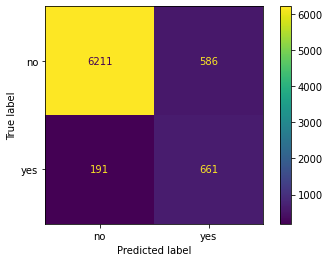

In [44]:
from sklearn.metrics import plot_confusion_matrix

fig = plt.figure()
plot_confusion_matrix(model,X_test,y_test,display_labels=['no','yes'])
plt.show()